### Exploratory Analysis on Japan's population demographies

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

from datetime import datetime as dt
from statsmodels.graphics import tsaplots
import statsmodels.api as sm

## Historical Data

In [2]:
historical_data = pd.read_csv('japan_data/pre 2015 data.csv',header=[0,1],thousands=',')
historical_data = historical_data.rename(columns={'Unnamed: 0_level_0':'Column'})
historical_data

Column       1920                                                    \
        Age Both sexes      Male    Female  sexes Male.1 Female.1  ratio   
0  All ages   55963053  28044185  27918868  100.0   50.1     49.9  100.4   
1       <15   20416202  10309008  10107194   36.5   18.4     18.1  102.0   
2     15-64   32605495  16432736  16172759   58.3   29.4     28.9  101.6   
3       >65    2941356   1302441   1638915    5.3    2.3      2.9   79.5   
4     65-74    2209155   1014019   1195136    3.9    1.8      2.1   84.8   
5       >75     732201    288422    443779    1.3    0.5      0.8   65.0   

        1925            ...   2010                       2015            \
  Both sexes      Male  ... Male.1 Female.1  ratio Both sexes      Male   
0   59736822  30013109  ...   48.6     51.4   94.8  127094745  61841738   
1   21924045  11062641  ...    6.8      6.5  104.9   15886810   8133536   
2   34791714  17631164  ...   32.0     31.7  100.8   76288736  38394322   
3    3021063   1319304  ...    9.8     13.2   74.3   33465441  14485469   
4    2213520   1005030  ...    5.6      6.3   89.0   17339678   8242102   
5     807543    314274  ...    4.2      6.9   60.8   16125763   6243367   

                                           
     Female  sexes Male.1 Female.1  ratio  
0  65253007  100.0   48.6     51.4   94.8  
1   7753274   12.6    6.5      6.2  104.9  
2  37894414   60.7   30.6     30.2  101.3  
3  18979972   26.6   11.5     15.1   76.3  
4   9097576   13.8    6.6      7.2   90.6  
5   9882396   12.8    5.0      7.9   63.2  

[6 rows x 141 columns]

In [3]:
cols = historical_data.columns[1:]
years = set([item[0] for item in cols])

In [4]:
def process_data(data, year):
    df = data[year]
    df['year'] = year
    df.insert(loc = 0,
          column = 'Age',
          value = data['Column'].values)
    return df

historical_list = []
for year in years:
    historical_list.append(process_data(historical_data,year))
    

C:\Users\nedeesha.weerasuriya\AppData\Local\Temp\ipykernel_17064\1881110310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = year
C:\Users\nedeesha.weerasuriya\AppData\Local\Temp\ipykernel_17064\1881110310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = year
C:\Users\nedeesha.weerasuriya\AppData\Local\Temp\ipykernel_17064\1881110310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [5]:
total_list = []
for df in historical_list:
    total = df.iloc[:,1]
    age = df['Age']
    total_list.append(pd.DataFrame({df['year'][0]:dict(zip(age,total))}).T)

In [6]:
age_df = pd.concat(total_list)
age_df.set_index(age_df.iloc[:,0])
age_df = age_df.sort_index()
age_df = age_df[['All ages','<15','15-64','>65','65-74','>75']]
#age_df.to_csv('output/Japan_Age.csv')
age_df

,All ages,<15,15-64,>65,65-74,>75
1920,55963053,20416202,32605495,2941356,2209155,732201
1925,59736822,21924045,34791714,3021063,2213520,807543
1930,64450005,23579265,37806865,3063875,2182431,881444
1935,69254148,25545167,40484022,3224959,2300515,924444
1940,73075071,26368708,43251699,3453702,2550068,903634
1945,71998104,26477086,41820903,3700115,2827532,872583
1950,84114574,29786412,50168312,4155180,3085599,1069445
1955,90076594,30122897,55166615,4786199,3375261,1387610
1960,94301623,28434159,60469355,5397980,3756317,1641663
1965,99209137,25529230,67444242,6235614,4342084,1893530


In [7]:
df_2020 = pd.read_csv('japan_data/2020_Age_Data.csv',thousands=',')
total_2020 = df_2020.iloc[0,0]
df_2020

,000_Total,001_0 years old,002_1 years old,003_2 years old,004_3 years old,005_4 years old,006_5 years old,007_6 years old,008_7 years old,009_8 years old,...,112_Age not reported,R1_(Recount) Under 15 years old,R2_(Recount) 15--64 years old,R3_(Recount) 65 years old and over,R4_(Recount) 75 years old and over,R5_(Recount) 85 years old and over,R6_(Recount) 100 years old and over,R7_(Recount) 20--69 years old,Unnamed: 120,Unnamed: 121
0,126146099,831824,866525,910005,934063,973665,998664,996576,1020657,1024325,...,2931838,14955692,72922764,35335805,18248742,6021086,79523,75380592,47.66094,48.60554


In [8]:
missing = df_2020['112_Age not reported']

In [9]:
series_2020 = df_2020.iloc[:,-9:-5].apply(pd.to_numeric).sum()
series_2020

R1_(Recount) Under 15 years old       14955692
R2_(Recount) 15--64 years old         72922764
R3_(Recount) 65 years old and over    35335805
R4_(Recount) 75 years old and over    18248742
dtype: int64

Calculate 65-74 population

In [10]:
pop_65_74 = total_2020 - series_2020.drop('R3_(Recount) 65 years old and over',axis=0).sum()
pop_65_74

20018901

Check it adds up

In [11]:
check = int(series_2020.iloc[:-1].sum() + missing)
if check == total_2020:
    print('True')
    print(check)

True
126146099


In [12]:
age_df.loc['2020'] = pd.Series({'All ages':pd.to_numeric(total_2020)})
age_df

,All ages,<15,15-64,>65,65-74,>75
1920,55963053.0,20416202.0,32605495.0,2941356.0,2209155.0,732201.0
1925,59736822.0,21924045.0,34791714.0,3021063.0,2213520.0,807543.0
1930,64450005.0,23579265.0,37806865.0,3063875.0,2182431.0,881444.0
1935,69254148.0,25545167.0,40484022.0,3224959.0,2300515.0,924444.0
1940,73075071.0,26368708.0,43251699.0,3453702.0,2550068.0,903634.0
1945,71998104.0,26477086.0,41820903.0,3700115.0,2827532.0,872583.0
1950,84114574.0,29786412.0,50168312.0,4155180.0,3085599.0,1069445.0
1955,90076594.0,30122897.0,55166615.0,4786199.0,3375261.0,1387610.0
1960,94301623.0,28434159.0,60469355.0,5397980.0,3756317.0,1641663.0
1965,99209137.0,25529230.0,67444242.0,6235614.0,4342084.0,1893530.0


In [13]:
new_series_2020 = series_2020.iloc[:-1]
new_series_2020['65-74'] = pop_65_74
new_series_2020['>75'] = series_2020.iloc[-1]


In [14]:
new_series_2020

R1_(Recount) Under 15 years old       14955692
R2_(Recount) 15--64 years old         72922764
R3_(Recount) 65 years old and over    35335805
65-74                                 20018901
>75                                   18248742
dtype: int64

In [15]:
age_df.loc['2020'][1:] = new_series_2020
age_df

,All ages,<15,15-64,>65,65-74,>75
1920,55963053.0,20416202.0,32605495.0,2941356.0,2209155.0,732201.0
1925,59736822.0,21924045.0,34791714.0,3021063.0,2213520.0,807543.0
1930,64450005.0,23579265.0,37806865.0,3063875.0,2182431.0,881444.0
1935,69254148.0,25545167.0,40484022.0,3224959.0,2300515.0,924444.0
1940,73075071.0,26368708.0,43251699.0,3453702.0,2550068.0,903634.0
1945,71998104.0,26477086.0,41820903.0,3700115.0,2827532.0,872583.0
1950,84114574.0,29786412.0,50168312.0,4155180.0,3085599.0,1069445.0
1955,90076594.0,30122897.0,55166615.0,4786199.0,3375261.0,1387610.0
1960,94301623.0,28434159.0,60469355.0,5397980.0,3756317.0,1641663.0
1965,99209137.0,25529230.0,67444242.0,6235614.0,4342084.0,1893530.0


In [16]:
age_df.apply(pd.to_numeric)

,All ages,<15,15-64,>65,65-74,>75
1920,55963053.0,20416202.0,32605495.0,2941356.0,2209155.0,732201.0
1925,59736822.0,21924045.0,34791714.0,3021063.0,2213520.0,807543.0
1930,64450005.0,23579265.0,37806865.0,3063875.0,2182431.0,881444.0
1935,69254148.0,25545167.0,40484022.0,3224959.0,2300515.0,924444.0
1940,73075071.0,26368708.0,43251699.0,3453702.0,2550068.0,903634.0
1945,71998104.0,26477086.0,41820903.0,3700115.0,2827532.0,872583.0
1950,84114574.0,29786412.0,50168312.0,4155180.0,3085599.0,1069445.0
1955,90076594.0,30122897.0,55166615.0,4786199.0,3375261.0,1387610.0
1960,94301623.0,28434159.0,60469355.0,5397980.0,3756317.0,1641663.0
1965,99209137.0,25529230.0,67444242.0,6235614.0,4342084.0,1893530.0


In [125]:
age_df.index = pd.to_datetime(age_df.index)
age_df

,All ages,<15,15-64,>65,65-74,>75
1920-01-01,55963053.0,20416202.0,32605495.0,2941356.0,2209155.0,732201.0
1925-01-01,59736822.0,21924045.0,34791714.0,3021063.0,2213520.0,807543.0
1930-01-01,64450005.0,23579265.0,37806865.0,3063875.0,2182431.0,881444.0
1935-01-01,69254148.0,25545167.0,40484022.0,3224959.0,2300515.0,924444.0
1940-01-01,73075071.0,26368708.0,43251699.0,3453702.0,2550068.0,903634.0
1945-01-01,71998104.0,26477086.0,41820903.0,3700115.0,2827532.0,872583.0
1950-01-01,84114574.0,29786412.0,50168312.0,4155180.0,3085599.0,1069445.0
1955-01-01,90076594.0,30122897.0,55166615.0,4786199.0,3375261.0,1387610.0
1960-01-01,94301623.0,28434159.0,60469355.0,5397980.0,3756317.0,1641663.0
1965-01-01,99209137.0,25529230.0,67444242.0,6235614.0,4342084.0,1893530.0


In [18]:
age_df.to_csv('output/Japan_Age.csv')

In [19]:
single_ages = df_2020.iloc[:,1:-10]
single_ages

,001_0 years old,002_1 years old,003_2 years old,004_3 years old,005_4 years old,006_5 years old,007_6 years old,008_7 years old,009_8 years old,010_9 years old,...,102_101 years old,103_102 years old,104_103 years old,105_104 years old,106_105 years old,107_106 years old,108_107 years old,109_108 years old,110_109 years old,111_110 years old and over
0,831824,866525,910005,934063,973665,998664,996576,1020657,1024325,1048871,...,17112,11855,7304,4705,2824,1724,1058,557,211,141


In [20]:
single_ages.columns[1].split()[0].split('_')[-1]

'1'

In [21]:
single_ages.columns = single_ages.columns.str.split().str[0]
single_ages.columns = single_ages.columns.str.split('_').str[1]

In [22]:
single_ages

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
0,831824,866525,910005,934063,973665,998664,996576,1020657,1024325,1048871,...,17112,11855,7304,4705,2824,1724,1058,557,211,141


Text(0.5, 1.0, 'Japan 2020 Age Distribution')

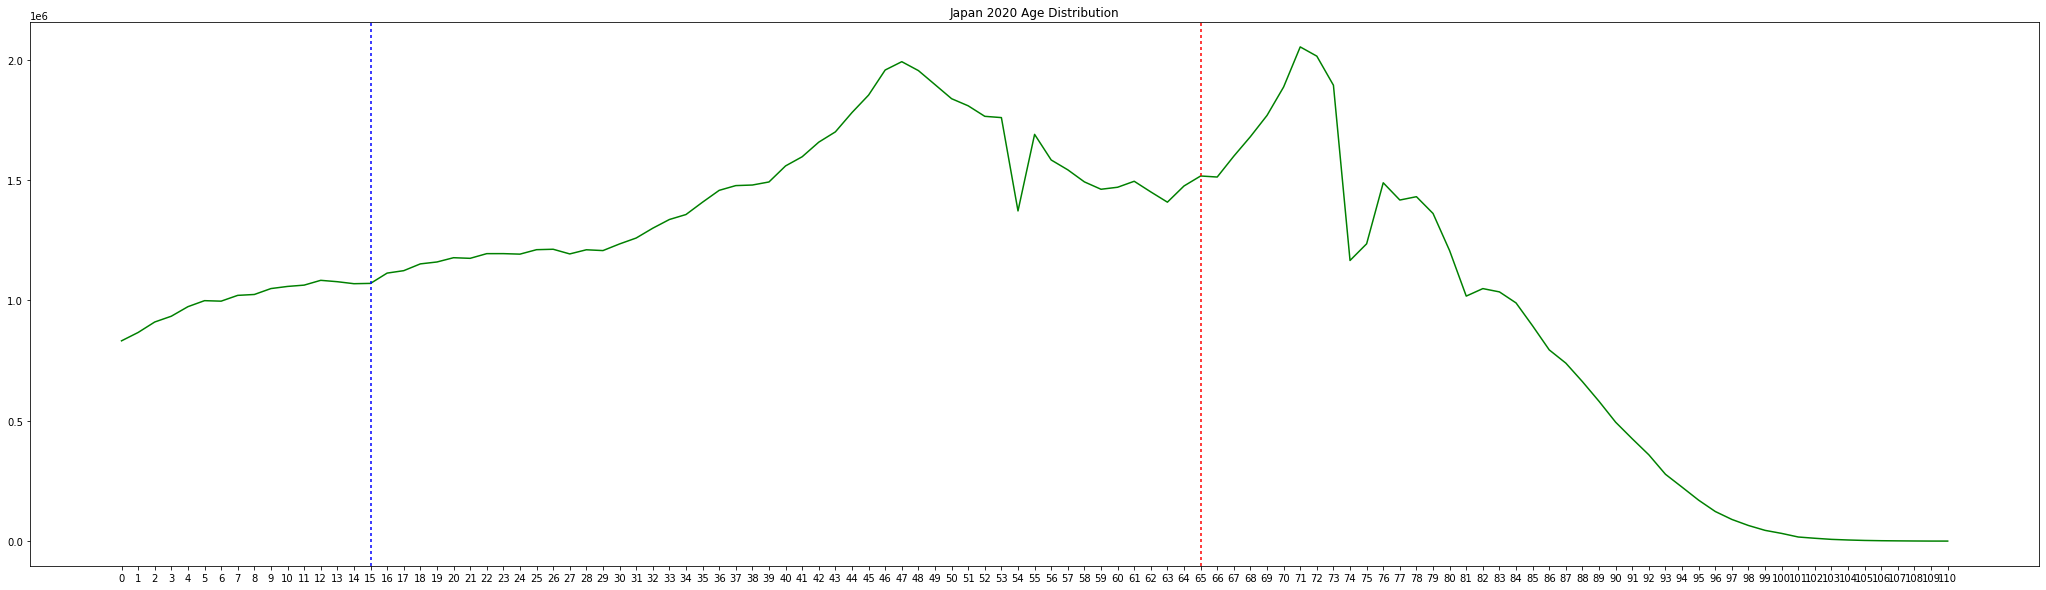

In [23]:
plt.figure(figsize=(36,10))
plt.plot(single_ages.iloc[0],c='g')
plt.axvline(65,c='r',dashes=(2,2))
plt.axvline(15,c='b',dashes=(2,2))
plt.title('Japan 2020 Age Distribution')

In [24]:
current_working_age = single_ages.iloc[0,15:66].sum()/single_ages.iloc[0,:].sum()
retirees = single_ages.iloc[0,66:].sum()/single_ages.iloc[0,:].sum()
print("Percentage of population of working age: ", round(current_working_age * 100,2), "%")
print("Percentage of over 65s: ",round(retirees*100,2), "%")

Percentage of population of working age:  60.41 %
Percentage of over 65s:  27.45 %


In [25]:
def death_rate(df):
    df1 = df.copy()
    old1 = df1.iloc[0,66:85]
    old2 = df1.iloc[0,85:]
    for idx, row in enumerate(old1):
        key = int(old1.keys()[idx])
        rate = 1 - key/500
        old1.iloc[idx] = row * rate

    for idx, row in enumerate(old2):
        key = int(old2.keys()[idx])
        rate = 1 - key/200
        old2.iloc[idx] = row * rate
    
    return old1.append(old2)
    

In [26]:
future_15 = single_ages.shift(15,axis=1)
future_15 = future_15.fillna(method = 'bfill',axis=1)
elderly = death_rate(future_15)
elderly

C:\Users\nedeesha.weerasuriya\AppData\Local\Temp\ipykernel_17064\3518257715.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return old1.append(old2)


66     1569251.992
67     1527810.190
68     1519737.120
69     1182108.872
70     1452789.400
71     1358136.780
72     1319966.552
73     1274122.738
74     1245042.936
75     1249221.200
76     1267331.760
77     1226938.572
78     1188132.560
79     1241950.842
80     1273810.440
81     1267154.884
82     1336629.404
83     1400999.070
84     1470988.480
85     1084542.000
86     1169936.970
87     1137990.795
88     1060296.160
89      646899.675
90      679157.600
91      811119.140
92      764948.340
93      765297.170
94      721208.630
95      633180.450
96      529170.200
97      540104.705
98      527879.070
99      499561.655
100     446877.000
101     393110.190
102     362183.010
103     321192.220
104     278642.880
105     234566.400
106     199769.740
107     166649.490
108     127701.980
109     101988.705
110      76494.600
Name: 0, dtype: float64

Text(0.5, 1.0, 'Japan 2020 Age Distribution in 15 years')

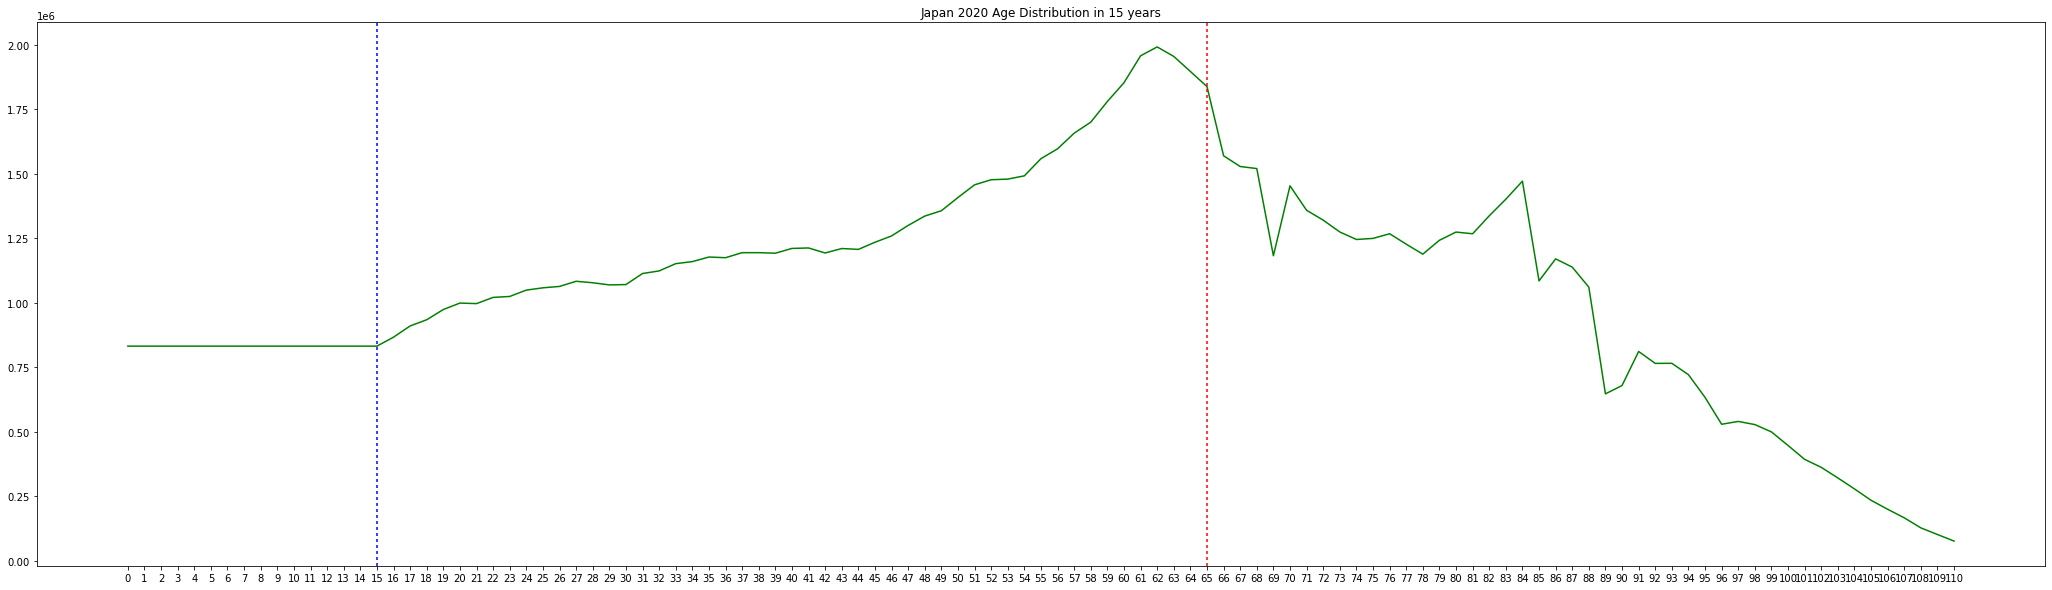

In [27]:
new_future_15 = future_15.copy()
new_future_15.iloc[0,66:] = elderly
plt.figure(figsize=(36,10))
plt.plot(new_future_15.iloc[0],c='g')
plt.axvline(65,c='r',dashes=(2,2))
plt.axvline(15,c='b',dashes=(2,2))
plt.title('Japan 2020 Age Distribution in 15 years')

In [28]:
working_age_prop = new_future_15.iloc[0,15:66].sum()/new_future_15.iloc[0,:].sum()
retirees_15 = new_future_15.iloc[0,66:].sum()/new_future_15.iloc[0,:].sum()
print("Percentage of population of working age: ", round(working_age_prop * 100,2), "%")
print("Percentage of over 65s: ",round(retirees_15*100,2), "%")

Percentage of population of working age:  55.91 %
Percentage of over 65s:  33.54 %


In [29]:
future_30 = new_future_15.shift(15,axis=1)
future_30 = future_30.fillna(method = 'bfill',axis=1)
elders_30 = death_rate(future_30)
future_30.iloc[0,66:] = elders_30
future_30


C:\Users\nedeesha.weerasuriya\AppData\Local\Temp\ipykernel_17064\3518257715.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return old1.append(old2)


,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
0,831824.0,831824.0,831824.0,831824.0,831824.0,831824.0,831824.0,831824.0,831824.0,831824.0,...,579118.80015,557615.48955,514243.6376,310511.844,322599.86,381225.9958,355700.9781,352036.6982,328149.92665,284931.2025


Text(0.5, 1.0, 'Japan 2020 Age Distribution in 30 Years')

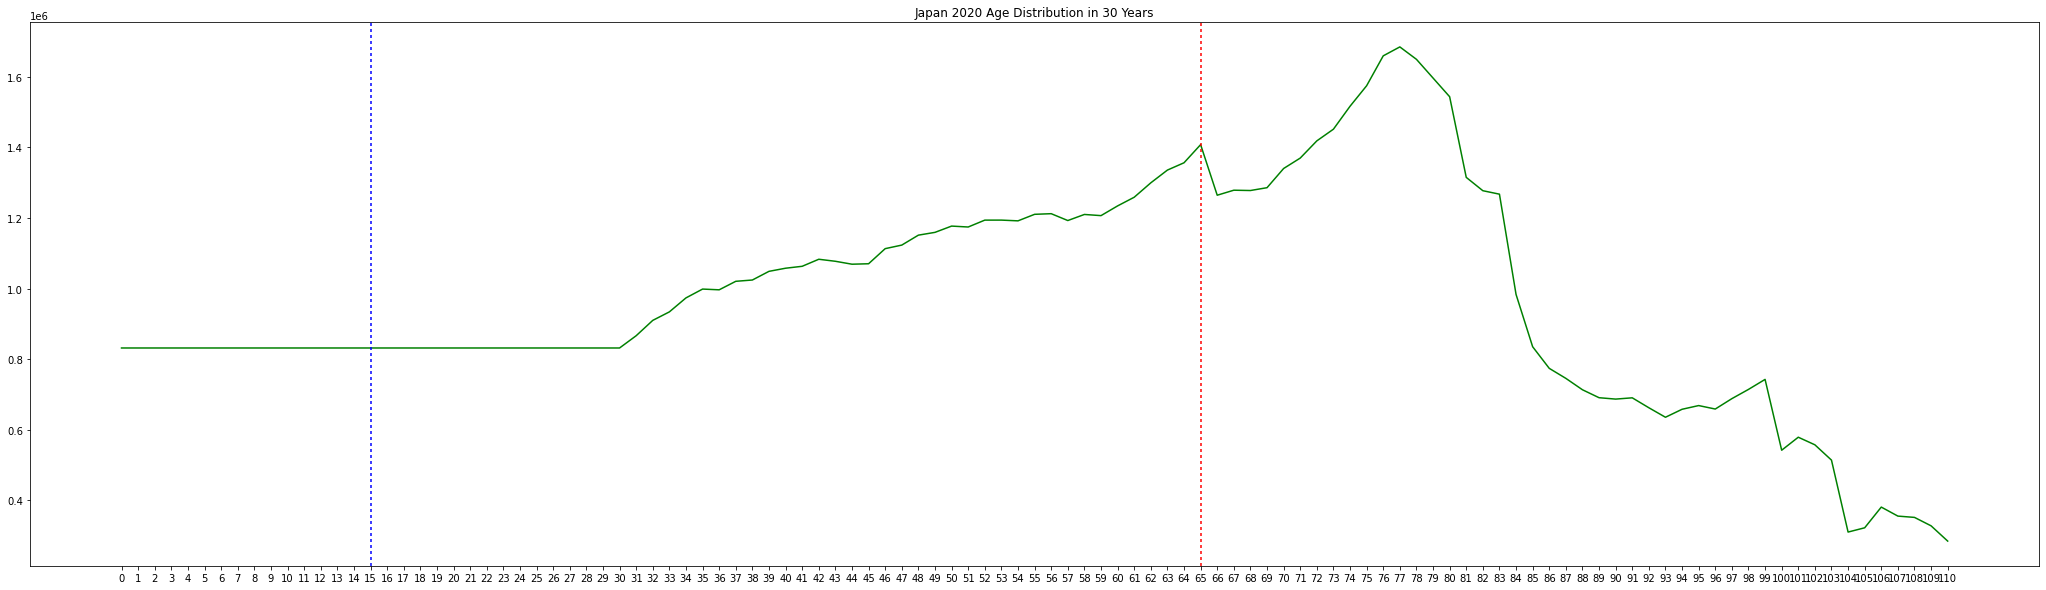

In [30]:

plt.figure(figsize=(36,10))
plt.plot(future_30.iloc[0],c='g')
plt.axvline(65,c='r',dashes=(2,2))
plt.axvline(15,c='b',dashes=(2,2))
plt.title('Japan 2020 Age Distribution in 30 Years')

In [31]:
working_age_prop = future_30.iloc[0,15:66].sum()/future_30.iloc[0,:].sum()
retirees_45 = future_30.iloc[0,66:].sum()/future_30.iloc[0,:].sum()
print("Percentage of population of working age: ", round(working_age_prop * 100,2), "%")
print("Percentage of over 65s: ",round(retirees_45*100,2), "%")

Percentage of population of working age:  49.34 %
Percentage of over 65s:  39.03 %


## Population Growth Prediction AutoRegression

In [32]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg


In [48]:
# Run the test
PG_stationarityTest = adfuller(age_df['<15'], autolag='AIC')
print("P-value: ", PG_stationarityTest[1])

P-value:  0.00011014500386573774


In [91]:
# Create training and test data

train_data = age_df['<15'][:round(len(age_df['<15'])*0.7)]
test_data = age_df['<15'][round(len(age_df['<15'])*0.7):]

In [92]:
test_data

1995-01-01    20013730.0
2000-01-01    18472499.0
2005-01-01    17521234.0
2010-01-01    16803444.0
2015-01-01    15886810.0
2020-01-01    14955692.0
Name: <15, dtype: float64

In [107]:
# Instantiate and fit the AR model with training data
ar_model = AutoReg(train_data, lags=4,trend='ct').fit()
print(ar_model.summary())
plt.show()

                            AutoReg Model Results                             
Dep. Variable:                    <15   No. Observations:                   15
Model:                     AutoReg(4)   Log Likelihood                -167.852
Method:               Conditional MLE   S.D. of innovations        1025113.971
Date:                Thu, 23 Mar 2023   AIC                            349.704
Time:                        09:36:45   BIC                            352.489
Sample:                    01-01-1940   HQIC                           347.948
                         - 01-01-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.322e+07   6.09e+06      2.171      0.030    1.29e+06    2.51e+07
trend      -4.541e+05   1.38e+05     -3.283      0.001   -7.25e+05   -1.83e+05
<15.L1         0.8520      0.292      2.922      0.0

c:\Users\nedeesha.weerasuriya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5AS-JAN will be used.
  self._init_dates(dates, freq)


c:\Users\nedeesha.weerasuriya\Anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


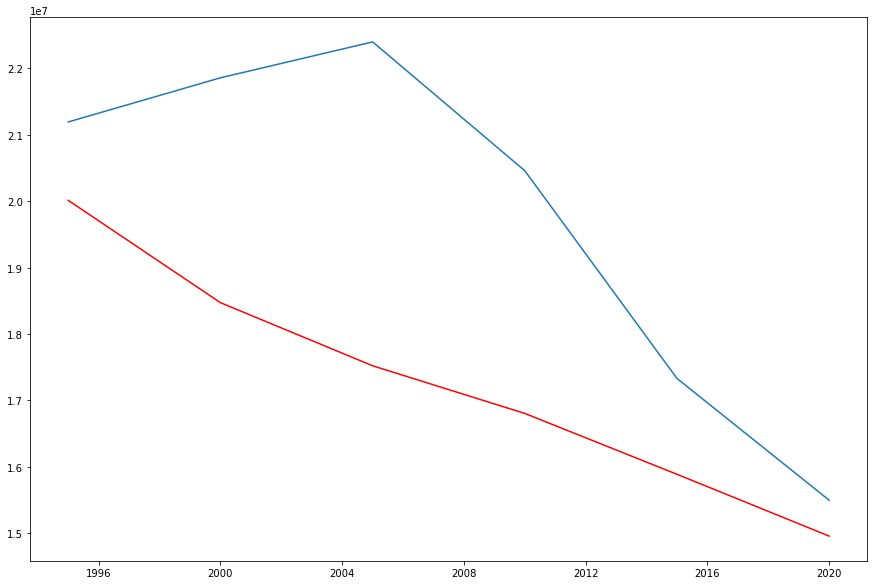

In [108]:
# Make the predictions

plt.figure(figsize=[15,10])
pred = ar_model.predict(start=len(train_data), end=(len(age_df)-1), dynamic=False)

# Plot the prediction vs test data
plt.plot(pred)
plt.plot(test_data, color='red')

c:\Users\nedeesha.weerasuriya\Anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


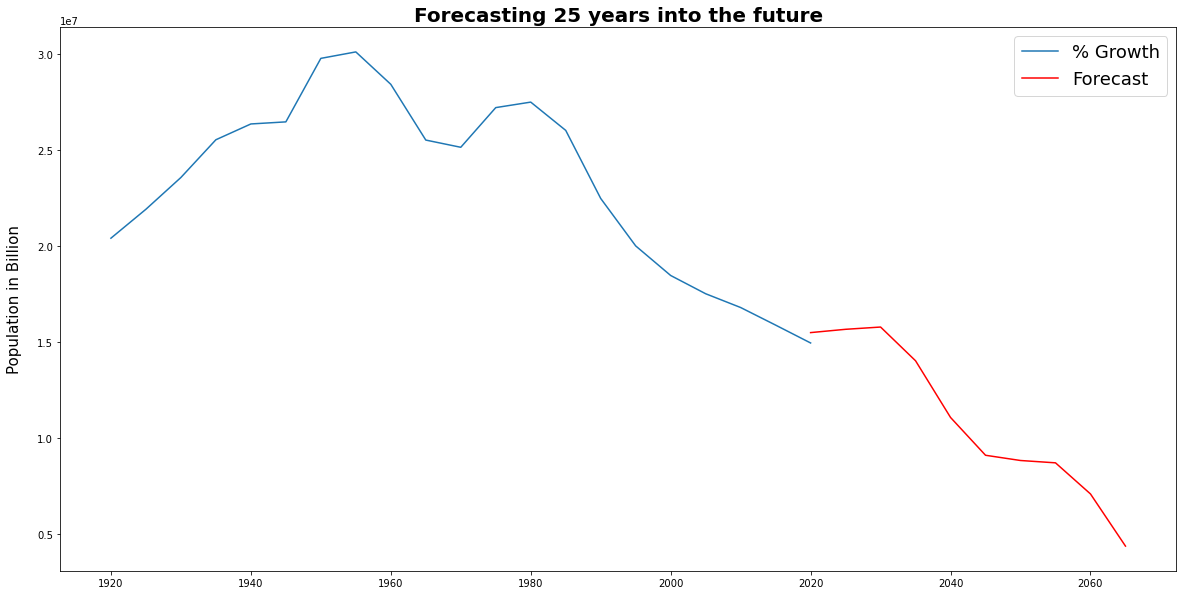

In [109]:
# Make the predictions
plt.figure(figsize=[20,10])
plt.plot(age_df['<15'],label="% Growth")
pred = ar_model.predict(start=len(age_df)-1, end=(len(age_df)+8), dynamic=False)
plt.plot(pred,color='red',label="Forecast")
# plt.xticks([i*4 for i in range(28)],labels = [1930 + i*4 for i in range(28)])
plt.ylabel("Population in Billion",fontsize=15,fontweight=550,labelpad=15)
plt.title("Forecasting 25 years into the future",fontsize=20,fontweight=600)

plt.legend(fontsize=18)

In [238]:
from statsmodels.tsa.holtwinters import Holt
def holt_smoothing(df,category,start=2020):
    num_year = int((2050-start)/5)
    train = df[:round(len(age_df['<15'])*0.95)]
    test = df[round(len(age_df['<15'])*0.95):]
    model = Holt(np.asarray(train))
    #model._index = pd.to_datetime(df.index)
    fit1 = model.fit(smoothing_level=.7, smoothing_trend=.1)
    pred1 = fit1.forecast(len(test)+num_year)
    fit2 = model.fit(smoothing_level=.5, smoothing_trend=.25)
    pred2 = fit2.forecast(len(test)+num_year)
    fit3 = model.fit(smoothing_level=.3, smoothing_trend=.15)
    pred3 = fit3.forecast(len(test)+num_year)


    fig, ax = plt.subplots(figsize=(20, 12))
    ax.plot(df.index, df.values)
    for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
        ax.plot(train.index, f.fittedvalues, color=c)
        ax.plot([pd.to_datetime(f'{year}-12-31T00:00:00.000000000') for year in range(start,2055,5)], p, label="alpha="+str(f.params['smoothing_level'])[:4]+", beta="+str(f.params['smoothing_trend'])[:4], color=c)
    plt.xlabel("Year",fontsize=15,fontweight=550,labelpad=15)
    plt.ylabel("Population in 10 billions",fontsize=15,fontweight=550,labelpad=15)
    plt.title(f"Holt's Exponential Smoothing predictions {category}",fontsize=20,fontweight=600)
    plt.legend(fontsize=18)
    return pred1


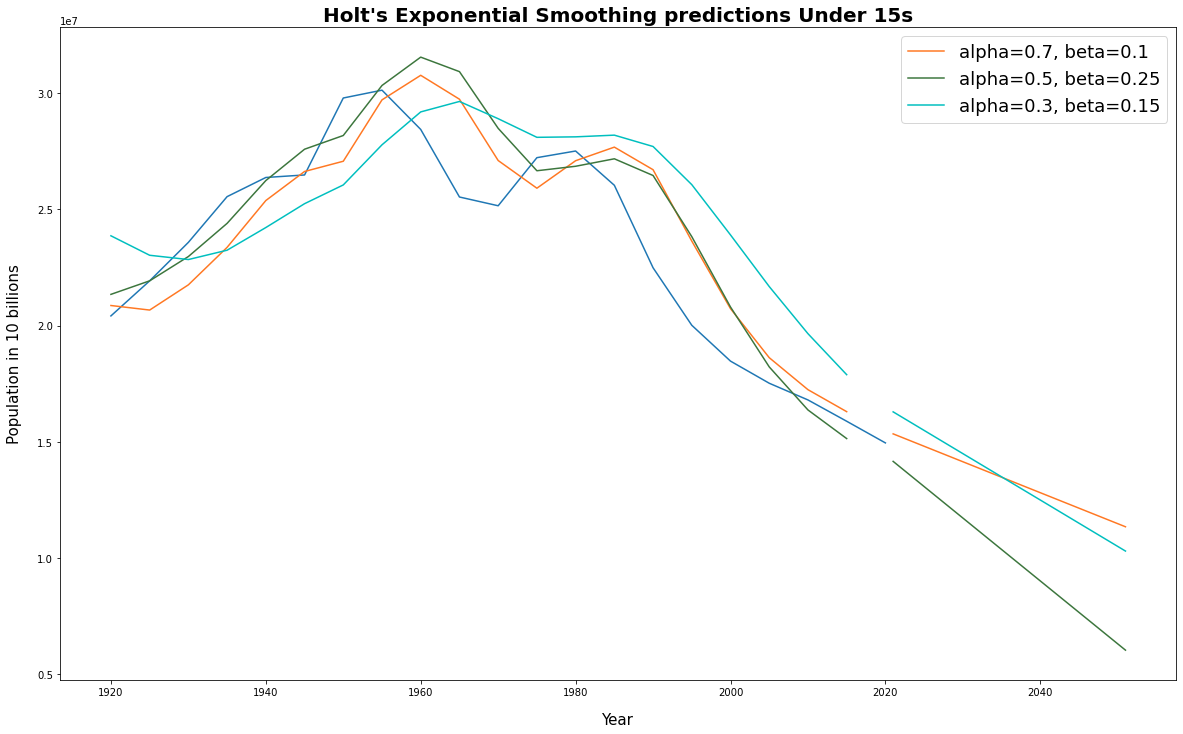

In [234]:
pred_15s = holt_smoothing(age_df['<15'],"Under 15s",2020)

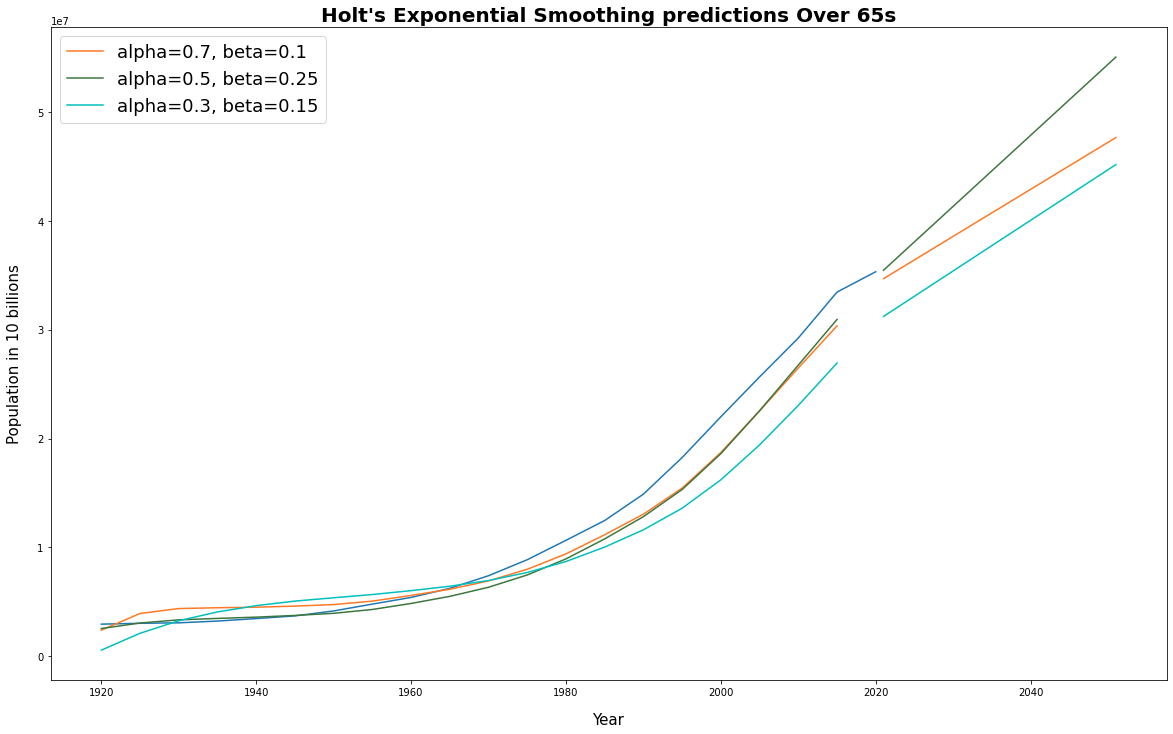

In [235]:
pred_65s = holt_smoothing(age_df['>65'],"Over 65s")

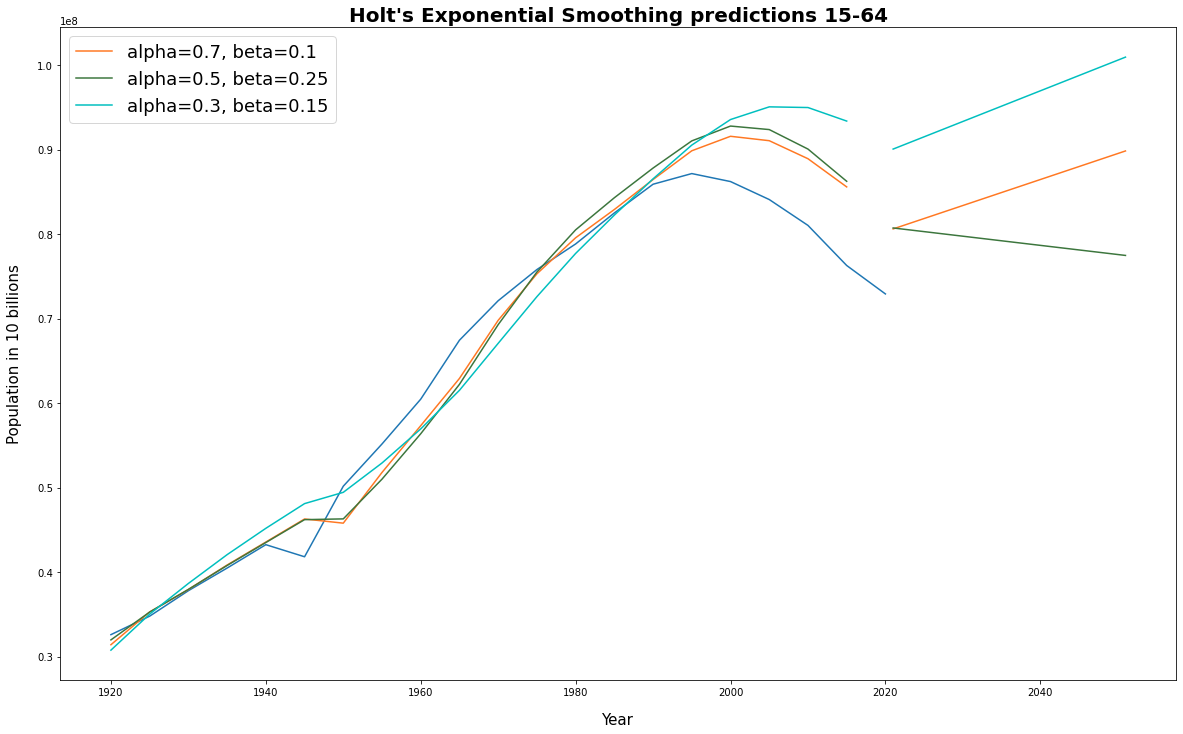

In [236]:
pred_working = holt_smoothing(age_df['15-64'],"15-64")

In [43]:
pred_65s

array([34696520.02749099, 36858333.00815395, 39020145.98881689,
       41181958.96947985, 43343771.9501428 , 45505584.93080576,
       47667397.91146871])

In [136]:
future_years = range(2025,2060,5)
over_65s_future = pd.Series(dict(zip(future_years,pred_65s)))
print(over_65s_future.index)
over_65s_future.index = pd.to_datetime(over_65s_future.index,format="%Y")
under_15s_future = pd.Series(dict(zip(future_years,pred_15s)))
under_15s_future.index = pd.to_datetime(under_15s_future.index,format="%Y")
under_15s_future

Int64Index([2025, 2030, 2035, 2040, 2045, 2050, 2055], dtype='int64')


2025-01-01    1.534467e+07
2030-01-01    1.467890e+07
2035-01-01    1.401312e+07
2040-01-01    1.334734e+07
2045-01-01    1.268157e+07
2050-01-01    1.201579e+07
2055-01-01    1.135001e+07
dtype: float64

In [111]:
age_df

,All ages,<15,15-64,>65,65-74,>75
1920-01-01,55963053.0,20416202.0,32605495.0,2941356.0,2209155.0,732201.0
1925-01-01,59736822.0,21924045.0,34791714.0,3021063.0,2213520.0,807543.0
1930-01-01,64450005.0,23579265.0,37806865.0,3063875.0,2182431.0,881444.0
1935-01-01,69254148.0,25545167.0,40484022.0,3224959.0,2300515.0,924444.0
1940-01-01,73075071.0,26368708.0,43251699.0,3453702.0,2550068.0,903634.0
1945-01-01,71998104.0,26477086.0,41820903.0,3700115.0,2827532.0,872583.0
1950-01-01,84114574.0,29786412.0,50168312.0,4155180.0,3085599.0,1069445.0
1955-01-01,90076594.0,30122897.0,55166615.0,4786199.0,3375261.0,1387610.0
1960-01-01,94301623.0,28434159.0,60469355.0,5397980.0,3756317.0,1641663.0
1965-01-01,99209137.0,25529230.0,67444242.0,6235614.0,4342084.0,1893530.0


In [213]:
pred_df = pd.DataFrame({"<15":under_15s_future,">65":over_65s_future})
#age_df.concat(pred_df,how='outer',left_index=True,right_index=True)
#new_age['<15'].merge(under_15s_future)
new_age = pd.concat([age_df,pred_df])
new_age

,All ages,<15,15-64,>65,65-74,>75
1920-01-01,55963053.0,2.041620e+07,32605495.0,2.941356e+06,2209155.0,732201.0
1925-01-01,59736822.0,2.192404e+07,34791714.0,3.021063e+06,2213520.0,807543.0
1930-01-01,64450005.0,2.357926e+07,37806865.0,3.063875e+06,2182431.0,881444.0
1935-01-01,69254148.0,2.554517e+07,40484022.0,3.224959e+06,2300515.0,924444.0
1940-01-01,73075071.0,2.636871e+07,43251699.0,3.453702e+06,2550068.0,903634.0
1945-01-01,71998104.0,2.647709e+07,41820903.0,3.700115e+06,2827532.0,872583.0
1950-01-01,84114574.0,2.978641e+07,50168312.0,4.155180e+06,3085599.0,1069445.0
1955-01-01,90076594.0,3.012290e+07,55166615.0,4.786199e+06,3375261.0,1387610.0
1960-01-01,94301623.0,2.843416e+07,60469355.0,5.397980e+06,3756317.0,1641663.0
1965-01-01,99209137.0,2.552923e+07,67444242.0,6.235614e+06,4342084.0,1893530.0


In [214]:
def fill_next_15_working_age(df,individual_age):
    work_list = []
    year_list=[]
    for i in range(5,20,5):
        year = pd.to_datetime('2020-01-01') + pd.offsets.DateOffset(years=i)
        current_work_age = individual_age.shift(i,axis=1).iloc[0,15:66].sum()
        df.loc[year,'15-64'] = current_work_age
    return df

new_age_df = fill_next_15_working_age(new_age,single_ages)
new_age_df

,All ages,<15,15-64,>65,65-74,>75
1920-01-01,55963053.0,2.041620e+07,32605495.0,2.941356e+06,2209155.0,732201.0
1925-01-01,59736822.0,2.192404e+07,34791714.0,3.021063e+06,2213520.0,807543.0
1930-01-01,64450005.0,2.357926e+07,37806865.0,3.063875e+06,2182431.0,881444.0
1935-01-01,69254148.0,2.554517e+07,40484022.0,3.224959e+06,2300515.0,924444.0
1940-01-01,73075071.0,2.636871e+07,43251699.0,3.453702e+06,2550068.0,903634.0
1945-01-01,71998104.0,2.647709e+07,41820903.0,3.700115e+06,2827532.0,872583.0
1950-01-01,84114574.0,2.978641e+07,50168312.0,4.155180e+06,3085599.0,1069445.0
1955-01-01,90076594.0,3.012290e+07,55166615.0,4.786199e+06,3375261.0,1387610.0
1960-01-01,94301623.0,2.843416e+07,60469355.0,5.397980e+06,3756317.0,1641663.0
1965-01-01,99209137.0,2.552923e+07,67444242.0,6.235614e+06,4342084.0,1893530.0


ValueError: x and y must have same first dimension, but have shapes (4,) and (11,)

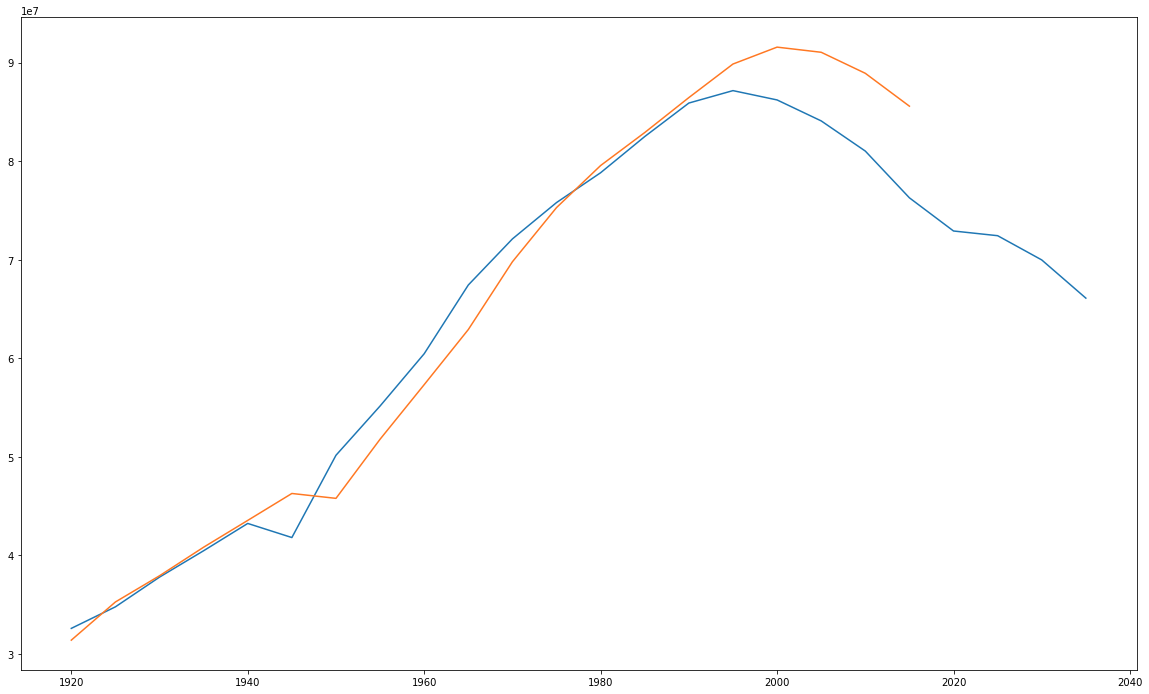

In [244]:
pred_working = holt_smoothing(new_age['15-64'],"15-64",start=2035)